In [1]:
import os

import numpy as np
import pandas as pd

from src import ImageQuant2, direcslist, load_image, nb_setup, raw_data_path

nb_setup()

%matplotlib widget

In [2]:
basepath = raw_data_path + "/Imaging/Optogenetics"
paths = direcslist(basepath, 2)

imgs = [load_image(p + "/rfp_channel_flat.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

In [3]:
# Load reference profiles
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
membg1 = np.loadtxt("../../data/calibration_mem1.txt")
membg2 = np.loadtxt("../../data/calibration_mem2.txt")
membg3 = np.loadtxt("../../data/calibration_mem3.txt")
membg4 = np.loadtxt("../../data/calibration_mem4.txt")
membg5 = np.loadtxt("../../data/calibration_mem5.txt")
membg6 = np.loadtxt("../../data/calibration_mem6.txt")

In [4]:
# Global calibration parameterrs
kwargs_dict = {"lr": 0.005, "descent_steps": 600}

### Quantification 0
Naive - uses error function and gaussian

  0%|                                                                                                                                                  | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/600 [00:00<05:58,  1.67it/s]

  2%|██▎                                                                                                                                      | 10/600 [00:00<00:32, 18.23it/s]

  3%|████                                                                                                                                     | 18/600 [00:00<00:18, 30.96it/s]

  4%|██████▏                                                                                                                                  | 27/600 [00:00<00:13, 43.60it/s]

  6%|████████▏                                                                                                                                | 36/600 [00:01<00:10, 53.40it/s]

  7%|██████████                                                                                                                               | 44/600 [00:01<00:09, 60.06it/s]

  9%|████████████                                                                                                                             | 53/600 [00:01<00:08, 66.08it/s]

 10%|██████████████▏                                                                                                                          | 62/600 [00:01<00:07, 70.32it/s]

 12%|███████████████▉                                                                                                                         | 70/600 [00:01<00:07, 72.07it/s]

 13%|██████████████████                                                                                                                       | 79/600 [00:01<00:06, 75.73it/s]

 15%|████████████████████                                                                                                                     | 88/600 [00:01<00:06, 79.05it/s]

 16%|██████████████████████▏                                                                                                                  | 97/600 [00:01<00:06, 81.73it/s]

 18%|████████████████████████                                                                                                                | 106/600 [00:01<00:05, 83.51it/s]

 19%|██████████████████████████                                                                                                              | 115/600 [00:01<00:05, 82.86it/s]

 21%|████████████████████████████                                                                                                            | 124/600 [00:02<00:05, 81.99it/s]

 22%|██████████████████████████████▏                                                                                                         | 133/600 [00:02<00:05, 80.40it/s]

 24%|████████████████████████████████▏                                                                                                       | 142/600 [00:02<00:05, 77.81it/s]

 25%|██████████████████████████████████                                                                                                      | 150/600 [00:02<00:05, 77.52it/s]

 26%|███████████████████████████████████▊                                                                                                    | 158/600 [00:02<00:05, 77.47it/s]

 28%|█████████████████████████████████████▋                                                                                                  | 166/600 [00:02<00:05, 77.51it/s]

 29%|███████████████████████████████████████▍                                                                                                | 174/600 [00:02<00:05, 77.34it/s]

 30%|█████████████████████████████████████████▎                                                                                              | 182/600 [00:02<00:05, 76.82it/s]

 32%|███████████████████████████████████████████                                                                                             | 190/600 [00:02<00:05, 70.70it/s]

 33%|████████████████████████████████████████████▉                                                                                           | 198/600 [00:03<00:05, 71.20it/s]

 34%|██████████████████████████████████████████████▋                                                                                         | 206/600 [00:03<00:05, 73.31it/s]

 36%|████████████████████████████████████████████████▌                                                                                       | 214/600 [00:03<00:05, 73.83it/s]

 37%|██████████████████████████████████████████████████▌                                                                                     | 223/600 [00:03<00:04, 75.89it/s]

 39%|████████████████████████████████████████████████████▌                                                                                   | 232/600 [00:03<00:04, 77.44it/s]

 40%|██████████████████████████████████████████████████████▍                                                                                 | 240/600 [00:03<00:04, 77.18it/s]

 41%|████████████████████████████████████████████████████████▏                                                                               | 248/600 [00:03<00:04, 77.42it/s]

 43%|██████████████████████████████████████████████████████████▎                                                                             | 257/600 [00:03<00:04, 78.88it/s]

 44%|████████████████████████████████████████████████████████████▎                                                                           | 266/600 [00:03<00:04, 79.68it/s]

 46%|██████████████████████████████████████████████████████████████▎                                                                         | 275/600 [00:04<00:03, 81.49it/s]

 47%|████████████████████████████████████████████████████████████████▎                                                                       | 284/600 [00:04<00:03, 82.75it/s]

 49%|██████████████████████████████████████████████████████████████████▍                                                                     | 293/600 [00:04<00:03, 82.32it/s]

 50%|████████████████████████████████████████████████████████████████████▍                                                                   | 302/600 [00:04<00:03, 79.97it/s]

 52%|██████████████████████████████████████████████████████████████████████▍                                                                 | 311/600 [00:04<00:03, 79.27it/s]

 53%|████████████████████████████████████████████████████████████████████████▎                                                               | 319/600 [00:04<00:03, 79.32it/s]

 55%|██████████████████████████████████████████████████████████████████████████                                                              | 327/600 [00:04<00:03, 79.46it/s]

 56%|████████████████████████████████████████████████████████████████████████████▏                                                           | 336/600 [00:04<00:03, 80.53it/s]

 57%|██████████████████████████████████████████████████████████████████████████████▏                                                         | 345/600 [00:04<00:03, 79.20it/s]

 59%|████████████████████████████████████████████████████████████████████████████████                                                        | 353/600 [00:05<00:03, 78.09it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▊                                                      | 361/600 [00:05<00:03, 77.62it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▊                                                    | 370/600 [00:05<00:02, 79.89it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▉                                                  | 379/600 [00:05<00:02, 80.38it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████▉                                                | 388/600 [00:05<00:02, 82.24it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▉                                              | 397/600 [00:05<00:02, 82.92it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████                                            | 406/600 [00:05<00:02, 83.45it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████                                          | 415/600 [00:05<00:02, 83.35it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████                                        | 424/600 [00:05<00:02, 82.60it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 433/600 [00:06<00:02, 80.95it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 442/600 [00:06<00:02, 78.43it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 451/600 [00:06<00:01, 80.83it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 460/600 [00:06<00:01, 81.63it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 469/600 [00:06<00:01, 81.31it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 478/600 [00:06<00:01, 80.99it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 487/600 [00:06<00:01, 82.76it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 496/600 [00:06<00:01, 83.89it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 505/600 [00:06<00:01, 83.97it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 514/600 [00:07<00:01, 83.23it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 523/600 [00:07<00:00, 83.01it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 532/600 [00:07<00:00, 81.58it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 541/600 [00:07<00:00, 80.88it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 550/600 [00:07<00:00, 80.28it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 559/600 [00:07<00:00, 80.24it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 568/600 [00:07<00:00, 80.82it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 577/600 [00:07<00:00, 79.58it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 586/600 [00:07<00:00, 79.87it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 595/600 [00:08<00:00, 80.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 74.21it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

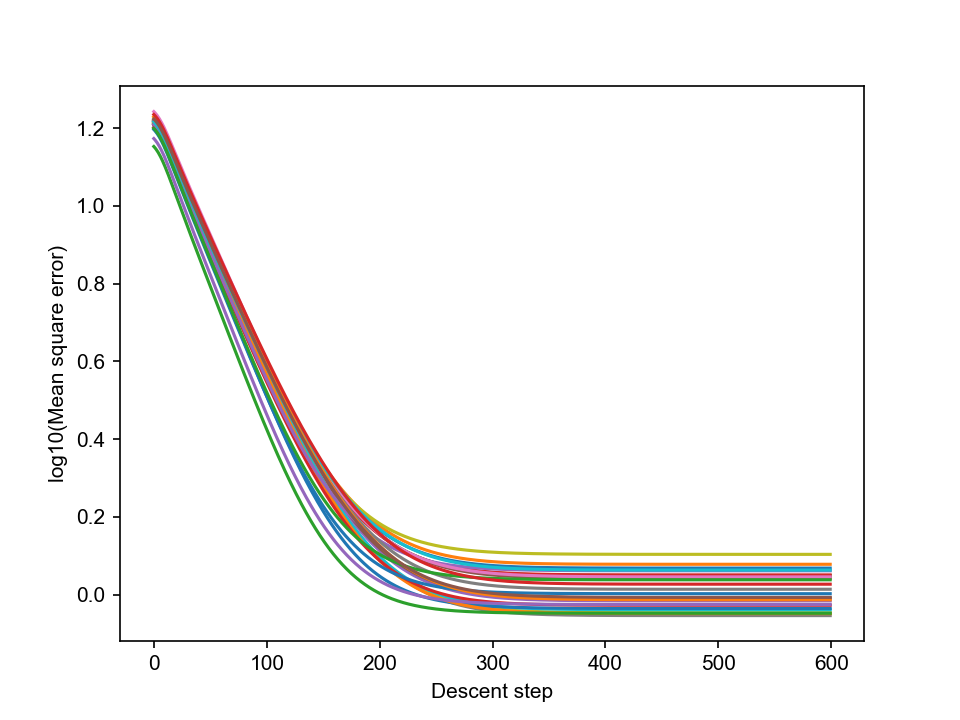

In [5]:
iq0 = ImageQuant2(img=imgs, roi=rois)
iq0.quantify(**kwargs_dict)
res0 = iq0.compile_res()
iq0.plot_losses(log=True)

### Quantification 1

  0%|                                                                                                                                                  | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/600 [00:00<02:40,  3.73it/s]

  2%|██▎                                                                                                                                      | 10/600 [00:00<00:17, 32.88it/s]

  3%|████▎                                                                                                                                    | 19/600 [00:00<00:11, 49.94it/s]

  5%|██████▍                                                                                                                                  | 28/600 [00:00<00:09, 60.21it/s]

  6%|████████▏                                                                                                                                | 36/600 [00:00<00:08, 65.94it/s]

  8%|██████████▎                                                                                                                              | 45/600 [00:00<00:07, 70.95it/s]

  9%|████████████▎                                                                                                                            | 54/600 [00:00<00:07, 74.43it/s]

 10%|██████████████▍                                                                                                                          | 63/600 [00:01<00:06, 76.78it/s]

 12%|████████████████▏                                                                                                                        | 71/600 [00:01<00:06, 76.04it/s]

 13%|██████████████████▎                                                                                                                      | 80/600 [00:01<00:06, 77.64it/s]

 15%|████████████████████▎                                                                                                                    | 89/600 [00:01<00:06, 79.07it/s]

 16%|██████████████████████▍                                                                                                                  | 98/600 [00:01<00:06, 80.68it/s]

 18%|████████████████████████▎                                                                                                               | 107/600 [00:01<00:06, 81.77it/s]

 19%|██████████████████████████▎                                                                                                             | 116/600 [00:01<00:05, 82.77it/s]

 21%|████████████████████████████▎                                                                                                           | 125/600 [00:01<00:05, 82.16it/s]

 22%|██████████████████████████████▎                                                                                                         | 134/600 [00:01<00:05, 82.27it/s]

 24%|████████████████████████████████▍                                                                                                       | 143/600 [00:02<00:05, 82.46it/s]

 25%|██████████████████████████████████▍                                                                                                     | 152/600 [00:02<00:05, 82.22it/s]

 27%|████████████████████████████████████▍                                                                                                   | 161/600 [00:02<00:05, 82.19it/s]

 28%|██████████████████████████████████████▌                                                                                                 | 170/600 [00:02<00:05, 82.37it/s]

 30%|████████████████████████████████████████▌                                                                                               | 179/600 [00:02<00:05, 82.68it/s]

 31%|██████████████████████████████████████████▌                                                                                             | 188/600 [00:02<00:05, 80.43it/s]

 33%|████████████████████████████████████████████▋                                                                                           | 197/600 [00:02<00:05, 79.92it/s]

 34%|██████████████████████████████████████████████▋                                                                                         | 206/600 [00:02<00:05, 77.94it/s]

 36%|████████████████████████████████████████████████▌                                                                                       | 214/600 [00:02<00:04, 77.59it/s]

 37%|██████████████████████████████████████████████████▎                                                                                     | 222/600 [00:03<00:05, 73.06it/s]

 38%|████████████████████████████████████████████████████▏                                                                                   | 230/600 [00:03<00:05, 67.49it/s]

 40%|█████████████████████████████████████████████████████▋                                                                                  | 237/600 [00:03<00:05, 64.84it/s]

 41%|███████████████████████████████████████████████████████▎                                                                                | 244/600 [00:03<00:05, 66.06it/s]

 42%|█████████████████████████████████████████████████████████▎                                                                              | 253/600 [00:03<00:04, 70.29it/s]

 44%|███████████████████████████████████████████████████████████▏                                                                            | 261/600 [00:03<00:04, 70.48it/s]

 45%|████████████████████████████████████████████████████████████▉                                                                           | 269/600 [00:03<00:04, 70.52it/s]

 46%|██████████████████████████████████████████████████████████████▊                                                                         | 277/600 [00:03<00:04, 70.23it/s]

 48%|████████████████████████████████████████████████████████████████▌                                                                       | 285/600 [00:03<00:04, 69.40it/s]

 49%|██████████████████████████████████████████████████████████████████▏                                                                     | 292/600 [00:04<00:04, 67.45it/s]

 50%|███████████████████████████████████████████████████████████████████▊                                                                    | 299/600 [00:04<00:04, 68.01it/s]

 51%|█████████████████████████████████████████████████████████████████████▎                                                                  | 306/600 [00:04<00:04, 68.42it/s]

 52%|██████████████████████████████████████████████████████████████████████▉                                                                 | 313/600 [00:04<00:04, 68.61it/s]

 54%|████████████████████████████████████████████████████████████████████████▊                                                               | 321/600 [00:04<00:03, 70.60it/s]

 55%|██████████████████████████████████████████████████████████████████████████▊                                                             | 330/600 [00:04<00:03, 74.33it/s]

 56%|████████████████████████████████████████████████████████████████████████████▊                                                           | 339/600 [00:04<00:03, 76.90it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▉                                                         | 348/600 [00:04<00:03, 79.06it/s]

 60%|████████████████████████████████████████████████████████████████████████████████▉                                                       | 357/600 [00:04<00:03, 80.39it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▉                                                     | 366/600 [00:05<00:02, 81.31it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████████                                                   | 375/600 [00:05<00:02, 81.78it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████                                                 | 384/600 [00:05<00:02, 82.72it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████                                               | 393/600 [00:05<00:02, 81.46it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████                                             | 402/600 [00:05<00:02, 80.97it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 411/600 [00:05<00:02, 81.59it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                        | 420/600 [00:05<00:02, 82.11it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 429/600 [00:05<00:02, 82.53it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 438/600 [00:05<00:01, 83.18it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 447/600 [00:06<00:01, 82.42it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 456/600 [00:06<00:01, 82.97it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 465/600 [00:06<00:01, 84.60it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 474/600 [00:06<00:01, 84.99it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 483/600 [00:06<00:01, 85.70it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 492/600 [00:06<00:01, 86.36it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 501/600 [00:06<00:01, 86.98it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 510/600 [00:06<00:01, 86.79it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 519/600 [00:06<00:00, 87.11it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 528/600 [00:06<00:00, 87.37it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 537/600 [00:07<00:00, 87.05it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 546/600 [00:07<00:00, 87.51it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 555/600 [00:07<00:00, 87.33it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 564/600 [00:07<00:00, 87.75it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 573/600 [00:07<00:00, 84.68it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 582/600 [00:07<00:00, 84.66it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 591/600 [00:07<00:00, 85.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 85.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 77.18it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

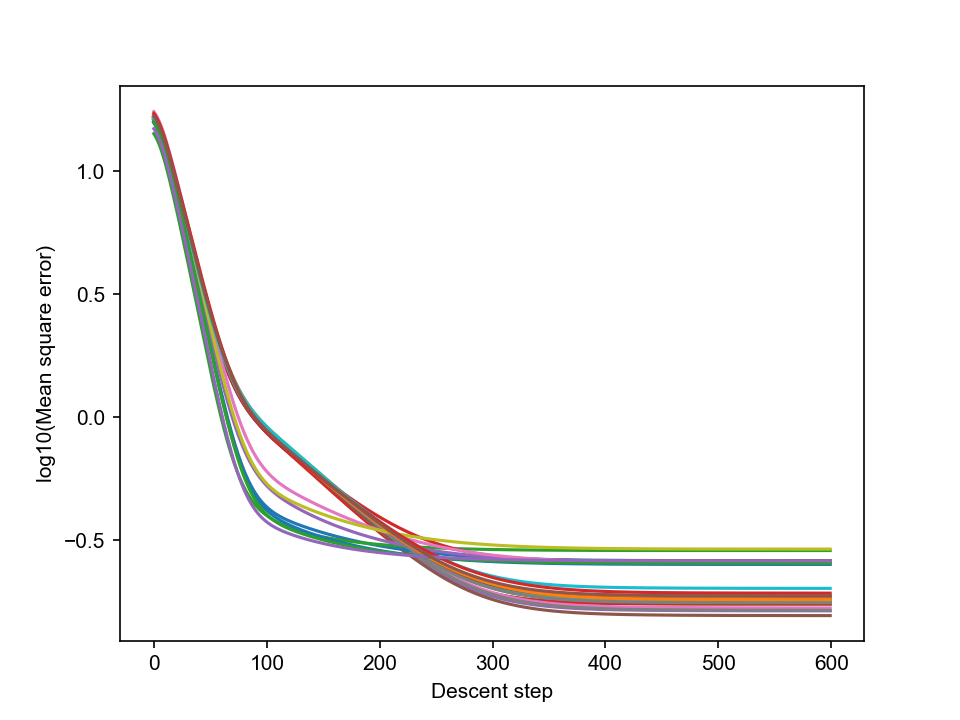

In [6]:
iq1 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg1)
iq1.quantify(**kwargs_dict)
res1 = iq1.compile_res()
iq1.plot_losses(log=True)

### Quantification 2

  0%|                                                                                                                                                  | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/600 [00:00<02:36,  3.82it/s]

  2%|██▎                                                                                                                                      | 10/600 [00:00<00:17, 33.35it/s]

  3%|███▉                                                                                                                                     | 17/600 [00:00<00:12, 45.02it/s]

  4%|█████▋                                                                                                                                   | 25/600 [00:00<00:10, 55.34it/s]

  6%|███████▊                                                                                                                                 | 34/600 [00:00<00:08, 64.59it/s]

  7%|█████████▊                                                                                                                               | 43/600 [00:00<00:07, 70.16it/s]

  9%|███████████▊                                                                                                                             | 52/600 [00:00<00:07, 74.01it/s]

 10%|█████████████▉                                                                                                                           | 61/600 [00:01<00:07, 76.82it/s]

 12%|███████████████▊                                                                                                                         | 69/600 [00:01<00:06, 77.65it/s]

 13%|█████████████████▌                                                                                                                       | 77/600 [00:01<00:06, 77.66it/s]

 14%|███████████████████▍                                                                                                                     | 85/600 [00:01<00:07, 71.74it/s]

 16%|█████████████████████▍                                                                                                                   | 94/600 [00:01<00:06, 75.87it/s]

 17%|███████████████████████▎                                                                                                                | 103/600 [00:01<00:06, 79.20it/s]

 19%|█████████████████████████▍                                                                                                              | 112/600 [00:01<00:05, 81.34it/s]

 20%|███████████████████████████▍                                                                                                            | 121/600 [00:01<00:05, 83.24it/s]

 22%|█████████████████████████████▍                                                                                                          | 130/600 [00:01<00:05, 83.86it/s]

 23%|███████████████████████████████▌                                                                                                        | 139/600 [00:01<00:05, 81.58it/s]

 25%|█████████████████████████████████▌                                                                                                      | 148/600 [00:02<00:05, 79.80it/s]

 26%|███████████████████████████████████▌                                                                                                    | 157/600 [00:02<00:05, 79.55it/s]

 28%|█████████████████████████████████████▍                                                                                                  | 165/600 [00:02<00:05, 79.25it/s]

 29%|███████████████████████████████████████▍                                                                                                | 174/600 [00:02<00:05, 79.79it/s]

 30%|█████████████████████████████████████████▍                                                                                              | 183/600 [00:02<00:05, 80.49it/s]

 32%|███████████████████████████████████████████▌                                                                                            | 192/600 [00:02<00:05, 81.52it/s]

 34%|█████████████████████████████████████████████▌                                                                                          | 201/600 [00:02<00:04, 81.56it/s]

 35%|███████████████████████████████████████████████▌                                                                                        | 210/600 [00:02<00:04, 81.32it/s]

 36%|█████████████████████████████████████████████████▋                                                                                      | 219/600 [00:02<00:04, 81.50it/s]

 38%|███████████████████████████████████████████████████▋                                                                                    | 228/600 [00:03<00:04, 81.80it/s]

 40%|█████████████████████████████████████████████████████▋                                                                                  | 237/600 [00:03<00:04, 80.78it/s]

 41%|███████████████████████████████████████████████████████▊                                                                                | 246/600 [00:03<00:04, 79.45it/s]

 42%|█████████████████████████████████████████████████████████▌                                                                              | 254/600 [00:03<00:04, 78.23it/s]

 44%|███████████████████████████████████████████████████████████▍                                                                            | 262/600 [00:03<00:04, 78.71it/s]

 45%|█████████████████████████████████████████████████████████████▍                                                                          | 271/600 [00:03<00:04, 79.71it/s]

 47%|███████████████████████████████████████████████████████████████▍                                                                        | 280/600 [00:03<00:03, 80.25it/s]

 48%|█████████████████████████████████████████████████████████████████▌                                                                      | 289/600 [00:03<00:03, 81.00it/s]

 50%|███████████████████████████████████████████████████████████████████▌                                                                    | 298/600 [00:03<00:03, 81.35it/s]

 51%|█████████████████████████████████████████████████████████████████████▌                                                                  | 307/600 [00:04<00:03, 82.26it/s]

 53%|███████████████████████████████████████████████████████████████████████▋                                                                | 316/600 [00:04<00:03, 81.77it/s]

 54%|█████████████████████████████████████████████████████████████████████████▋                                                              | 325/600 [00:04<00:03, 79.88it/s]

 56%|███████████████████████████████████████████████████████████████████████████▋                                                            | 334/600 [00:04<00:03, 82.19it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 343/600 [00:04<00:03, 83.44it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▊                                                        | 352/600 [00:04<00:02, 84.22it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▊                                                      | 361/600 [00:04<00:02, 84.97it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▊                                                    | 370/600 [00:04<00:02, 84.70it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▉                                                  | 379/600 [00:04<00:02, 83.77it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████▉                                                | 388/600 [00:05<00:02, 81.41it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▉                                              | 397/600 [00:05<00:02, 80.24it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████                                            | 406/600 [00:05<00:02, 80.78it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████████                                          | 415/600 [00:05<00:02, 82.58it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████                                        | 424/600 [00:05<00:02, 81.04it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 433/600 [00:05<00:02, 82.76it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 442/600 [00:05<00:01, 83.50it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 451/600 [00:05<00:01, 84.44it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 460/600 [00:05<00:01, 83.35it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 469/600 [00:06<00:01, 83.99it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 478/600 [00:06<00:01, 84.23it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 487/600 [00:06<00:01, 85.00it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 496/600 [00:06<00:01, 85.75it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 505/600 [00:06<00:01, 85.70it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 514/600 [00:06<00:00, 86.46it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 523/600 [00:06<00:00, 86.71it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 532/600 [00:06<00:00, 83.61it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 541/600 [00:06<00:00, 84.23it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 550/600 [00:06<00:00, 84.63it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 559/600 [00:07<00:00, 83.90it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 568/600 [00:07<00:00, 80.91it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 577/600 [00:07<00:00, 77.09it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 585/600 [00:07<00:00, 74.01it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 593/600 [00:07<00:00, 71.07it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 78.30it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

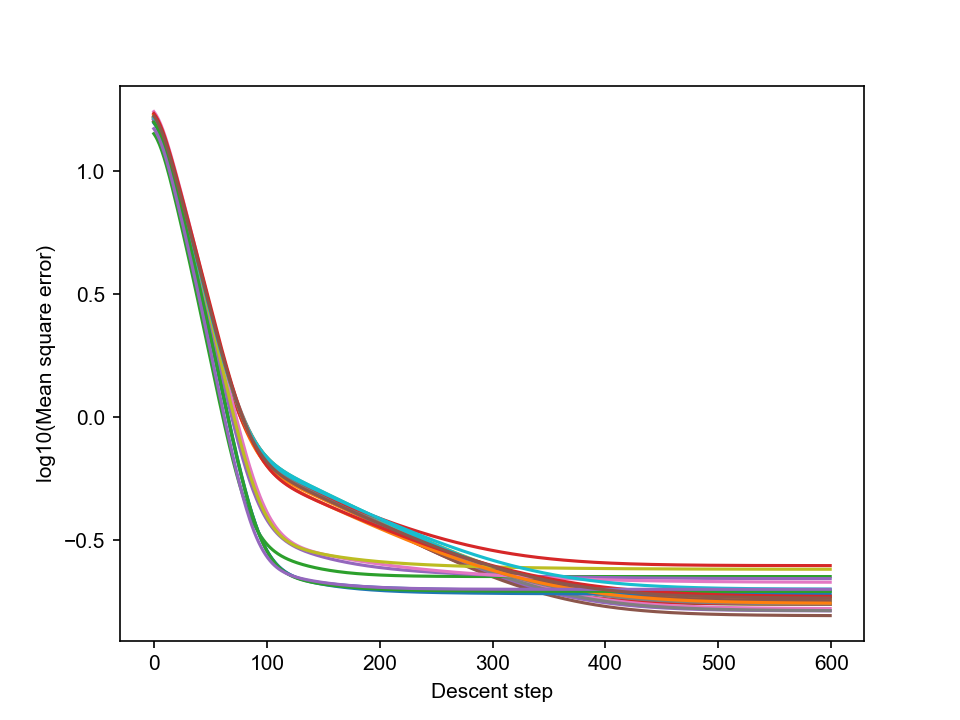

In [7]:
iq2 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg2)
iq2.quantify(**kwargs_dict)
res2 = iq2.compile_res()
iq2.plot_losses(log=True)

### Quantification 3

  0%|                                                                                                                                                  | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/600 [00:00<02:43,  3.66it/s]

  2%|██▎                                                                                                                                      | 10/600 [00:00<00:18, 32.34it/s]

  3%|████▎                                                                                                                                    | 19/600 [00:00<00:11, 49.06it/s]

  5%|██████▍                                                                                                                                  | 28/600 [00:00<00:09, 59.69it/s]

  6%|████████▍                                                                                                                                | 37/600 [00:00<00:08, 66.43it/s]

  8%|██████████▌                                                                                                                              | 46/600 [00:00<00:07, 71.74it/s]

  9%|████████████▌                                                                                                                            | 55/600 [00:00<00:07, 75.05it/s]

 11%|██████████████▌                                                                                                                          | 64/600 [00:01<00:06, 77.19it/s]

 12%|████████████████▋                                                                                                                        | 73/600 [00:01<00:06, 78.80it/s]

 14%|██████████████████▋                                                                                                                      | 82/600 [00:01<00:06, 78.14it/s]

 15%|████████████████████▊                                                                                                                    | 91/600 [00:01<00:06, 78.28it/s]

 16%|██████████████████████▌                                                                                                                  | 99/600 [00:01<00:06, 76.38it/s]

 18%|████████████████████████▍                                                                                                               | 108/600 [00:01<00:06, 77.81it/s]

 20%|██████████████████████████▌                                                                                                             | 117/600 [00:01<00:06, 79.42it/s]

 21%|████████████████████████████▎                                                                                                           | 125/600 [00:01<00:05, 79.52it/s]

 22%|██████████████████████████████▎                                                                                                         | 134/600 [00:01<00:05, 80.41it/s]

 24%|████████████████████████████████▍                                                                                                       | 143/600 [00:02<00:05, 80.83it/s]

 25%|██████████████████████████████████▍                                                                                                     | 152/600 [00:02<00:05, 81.82it/s]

 27%|████████████████████████████████████▍                                                                                                   | 161/600 [00:02<00:05, 83.41it/s]

 28%|██████████████████████████████████████▌                                                                                                 | 170/600 [00:02<00:05, 84.58it/s]

 30%|████████████████████████████████████████▌                                                                                               | 179/600 [00:02<00:04, 84.71it/s]

 31%|██████████████████████████████████████████▌                                                                                             | 188/600 [00:02<00:04, 83.95it/s]

 33%|████████████████████████████████████████████▋                                                                                           | 197/600 [00:02<00:04, 84.55it/s]

 34%|██████████████████████████████████████████████▋                                                                                         | 206/600 [00:02<00:04, 84.50it/s]

 36%|████████████████████████████████████████████████▋                                                                                       | 215/600 [00:02<00:04, 84.13it/s]

 37%|██████████████████████████████████████████████████▊                                                                                     | 224/600 [00:02<00:04, 83.82it/s]

 39%|████████████████████████████████████████████████████▊                                                                                   | 233/600 [00:03<00:04, 83.45it/s]

 40%|██████████████████████████████████████████████████████▊                                                                                 | 242/600 [00:03<00:04, 79.55it/s]

 42%|████████████████████████████████████████████████████████▋                                                                               | 250/600 [00:03<00:04, 77.40it/s]

 43%|██████████████████████████████████████████████████████████▋                                                                             | 259/600 [00:03<00:04, 78.32it/s]

 44%|████████████████████████████████████████████████████████████▌                                                                           | 267/600 [00:03<00:04, 76.12it/s]

 46%|██████████████████████████████████████████████████████████████▎                                                                         | 275/600 [00:03<00:04, 77.03it/s]

 47%|████████████████████████████████████████████████████████████████▎                                                                       | 284/600 [00:03<00:04, 78.42it/s]

 49%|██████████████████████████████████████████████████████████████████▍                                                                     | 293/600 [00:03<00:03, 79.42it/s]

 50%|████████████████████████████████████████████████████████████████████▍                                                                   | 302/600 [00:03<00:03, 80.42it/s]

 52%|██████████████████████████████████████████████████████████████████████▍                                                                 | 311/600 [00:04<00:03, 80.82it/s]

 53%|████████████████████████████████████████████████████████████████████████▌                                                               | 320/600 [00:04<00:03, 81.19it/s]

 55%|██████████████████████████████████████████████████████████████████████████▌                                                             | 329/600 [00:04<00:03, 81.11it/s]

 56%|████████████████████████████████████████████████████████████████████████████▌                                                           | 338/600 [00:04<00:03, 81.72it/s]

 58%|██████████████████████████████████████████████████████████████████████████████▋                                                         | 347/600 [00:04<00:03, 82.20it/s]

 59%|████████████████████████████████████████████████████████████████████████████████▋                                                       | 356/600 [00:04<00:02, 82.35it/s]

 61%|██████████████████████████████████████████████████████████████████████████████████▋                                                     | 365/600 [00:04<00:02, 82.52it/s]

 62%|████████████████████████████████████████████████████████████████████████████████████▊                                                   | 374/600 [00:04<00:02, 82.09it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▊                                                 | 383/600 [00:04<00:02, 81.89it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████████▊                                               | 392/600 [00:05<00:02, 82.10it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████████▉                                             | 401/600 [00:05<00:02, 82.18it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 410/600 [00:05<00:02, 82.55it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 419/600 [00:05<00:02, 84.06it/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████                                       | 428/600 [00:05<00:02, 85.07it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████                                     | 437/600 [00:05<00:01, 82.57it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 446/600 [00:05<00:01, 82.71it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 455/600 [00:05<00:01, 83.70it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 464/600 [00:05<00:01, 84.91it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 473/600 [00:06<00:01, 85.17it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 482/600 [00:06<00:01, 84.45it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 491/600 [00:06<00:01, 83.19it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 500/600 [00:06<00:01, 82.89it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 509/600 [00:06<00:01, 83.10it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 518/600 [00:06<00:00, 82.74it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 527/600 [00:06<00:00, 83.94it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 536/600 [00:06<00:00, 84.97it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 545/600 [00:06<00:00, 84.67it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 554/600 [00:07<00:00, 83.79it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 563/600 [00:07<00:00, 83.57it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 572/600 [00:07<00:00, 82.84it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 581/600 [00:07<00:00, 82.75it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 590/600 [00:07<00:00, 83.27it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 599/600 [00:07<00:00, 83.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 79.25it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

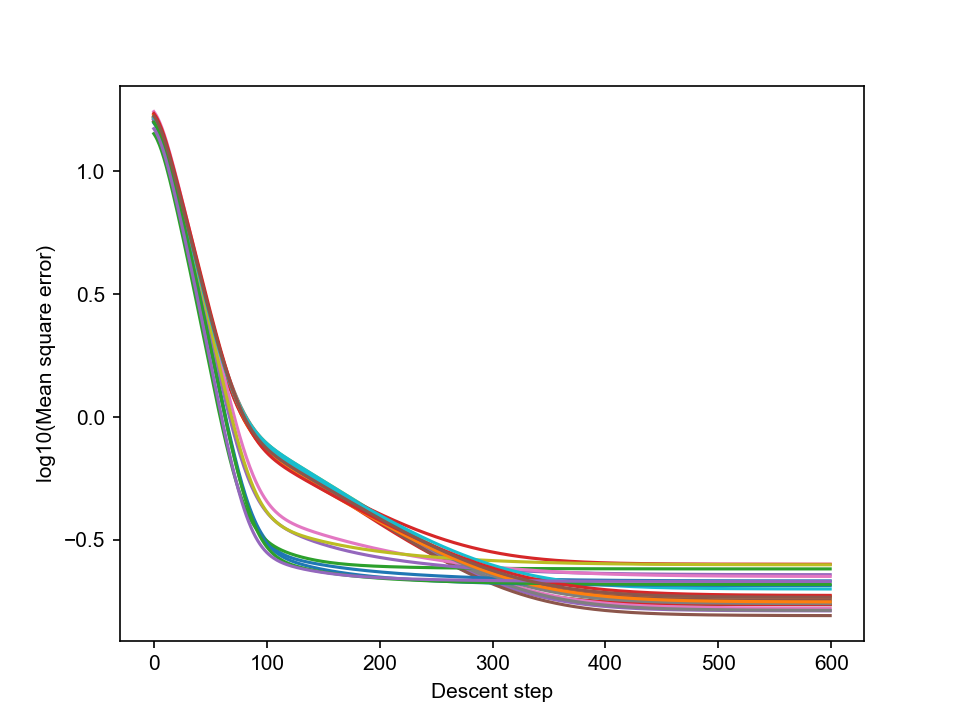

In [8]:
iq3 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg3)
iq3.quantify(**kwargs_dict)
res3 = iq3.compile_res()
iq3.plot_losses(log=True)

### Quantification 4

  0%|                                                                                                                                                  | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/600 [00:00<02:37,  3.81it/s]

  2%|██▎                                                                                                                                      | 10/600 [00:00<00:17, 33.27it/s]

  3%|████▎                                                                                                                                    | 19/600 [00:00<00:11, 49.96it/s]

  5%|██████▍                                                                                                                                  | 28/600 [00:00<00:09, 60.85it/s]

  6%|████████▍                                                                                                                                | 37/600 [00:00<00:08, 68.08it/s]

  8%|██████████▌                                                                                                                              | 46/600 [00:00<00:07, 72.42it/s]

  9%|████████████▌                                                                                                                            | 55/600 [00:00<00:07, 75.65it/s]

 11%|██████████████▌                                                                                                                          | 64/600 [00:01<00:06, 77.61it/s]

 12%|████████████████▋                                                                                                                        | 73/600 [00:01<00:06, 78.75it/s]

 14%|██████████████████▋                                                                                                                      | 82/600 [00:01<00:06, 79.39it/s]

 15%|████████████████████▊                                                                                                                    | 91/600 [00:01<00:06, 79.28it/s]

 17%|██████████████████████▋                                                                                                                 | 100/600 [00:01<00:06, 80.11it/s]

 18%|████████████████████████▋                                                                                                               | 109/600 [00:01<00:06, 80.92it/s]

 20%|██████████████████████████▋                                                                                                             | 118/600 [00:01<00:06, 79.78it/s]

 21%|████████████████████████████▊                                                                                                           | 127/600 [00:01<00:05, 81.19it/s]

 23%|██████████████████████████████▊                                                                                                         | 136/600 [00:01<00:05, 81.69it/s]

 24%|████████████████████████████████▊                                                                                                       | 145/600 [00:02<00:05, 81.21it/s]

 26%|██████████████████████████████████▉                                                                                                     | 154/600 [00:02<00:05, 81.52it/s]

 27%|████████████████████████████████████▉                                                                                                   | 163/600 [00:02<00:05, 80.73it/s]

 29%|██████████████████████████████████████▉                                                                                                 | 172/600 [00:02<00:05, 81.07it/s]

 30%|█████████████████████████████████████████                                                                                               | 181/600 [00:02<00:05, 81.17it/s]

 32%|███████████████████████████████████████████                                                                                             | 190/600 [00:02<00:05, 81.23it/s]

 33%|█████████████████████████████████████████████                                                                                           | 199/600 [00:02<00:04, 80.39it/s]

 35%|███████████████████████████████████████████████▏                                                                                        | 208/600 [00:02<00:04, 80.47it/s]

 36%|█████████████████████████████████████████████████▏                                                                                      | 217/600 [00:02<00:04, 80.95it/s]

 38%|███████████████████████████████████████████████████▏                                                                                    | 226/600 [00:03<00:04, 81.31it/s]

 39%|█████████████████████████████████████████████████████▎                                                                                  | 235/600 [00:03<00:04, 82.52it/s]

 41%|███████████████████████████████████████████████████████▎                                                                                | 244/600 [00:03<00:04, 82.98it/s]

 42%|█████████████████████████████████████████████████████████▎                                                                              | 253/600 [00:03<00:04, 84.04it/s]

 44%|███████████████████████████████████████████████████████████▍                                                                            | 262/600 [00:03<00:04, 84.44it/s]

 45%|█████████████████████████████████████████████████████████████▍                                                                          | 271/600 [00:03<00:03, 83.97it/s]

 47%|███████████████████████████████████████████████████████████████▍                                                                        | 280/600 [00:03<00:03, 83.90it/s]

 48%|█████████████████████████████████████████████████████████████████▌                                                                      | 289/600 [00:03<00:03, 80.99it/s]

 50%|███████████████████████████████████████████████████████████████████▌                                                                    | 298/600 [00:03<00:03, 81.01it/s]

 51%|█████████████████████████████████████████████████████████████████████▌                                                                  | 307/600 [00:04<00:03, 81.47it/s]

 53%|███████████████████████████████████████████████████████████████████████▋                                                                | 316/600 [00:04<00:03, 80.88it/s]

 54%|█████████████████████████████████████████████████████████████████████████▋                                                              | 325/600 [00:04<00:03, 81.53it/s]

 56%|███████████████████████████████████████████████████████████████████████████▋                                                            | 334/600 [00:04<00:03, 81.55it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▋                                                          | 343/600 [00:04<00:03, 82.05it/s]

 59%|███████████████████████████████████████████████████████████████████████████████▊                                                        | 352/600 [00:04<00:03, 81.98it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▊                                                      | 361/600 [00:04<00:02, 82.12it/s]

 62%|███████████████████████████████████████████████████████████████████████████████████▊                                                    | 370/600 [00:04<00:02, 82.26it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▉                                                  | 379/600 [00:04<00:02, 82.73it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████████▉                                                | 388/600 [00:04<00:02, 82.48it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▉                                              | 397/600 [00:05<00:02, 79.12it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████████▊                                            | 405/600 [00:05<00:02, 75.02it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 413/600 [00:05<00:02, 73.34it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 421/600 [00:05<00:02, 74.26it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                      | 430/600 [00:05<00:02, 76.97it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 439/600 [00:05<00:02, 79.11it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                                  | 448/600 [00:05<00:01, 79.45it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 456/600 [00:05<00:01, 78.73it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 464/600 [00:05<00:01, 77.48it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 472/600 [00:06<00:01, 77.14it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 481/600 [00:06<00:01, 78.41it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 490/600 [00:06<00:01, 79.92it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 499/600 [00:06<00:01, 80.92it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 508/600 [00:06<00:01, 82.48it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 517/600 [00:06<00:00, 84.03it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 526/600 [00:06<00:00, 82.25it/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 535/600 [00:06<00:00, 81.39it/s]

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 544/600 [00:06<00:00, 81.72it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 553/600 [00:07<00:00, 81.78it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 562/600 [00:07<00:00, 81.30it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 571/600 [00:07<00:00, 81.18it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 580/600 [00:07<00:00, 81.89it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 589/600 [00:07<00:00, 81.80it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 598/600 [00:07<00:00, 81.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 78.39it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

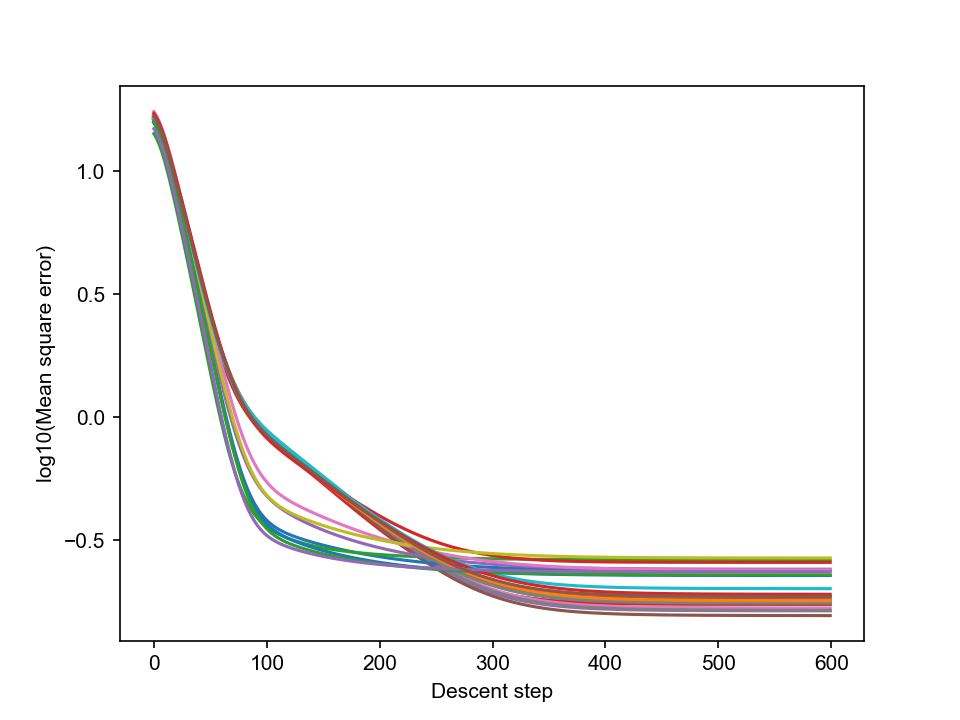

In [9]:
iq4 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg4)
iq4.quantify(**kwargs_dict)
res4 = iq4.compile_res()
iq4.plot_losses(log=True)

### Quantification 5

  0%|                                                                                                                                                  | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/600 [00:00<02:39,  3.75it/s]

  2%|██▎                                                                                                                                      | 10/600 [00:00<00:17, 33.03it/s]

  3%|████▎                                                                                                                                    | 19/600 [00:00<00:11, 50.23it/s]

  5%|██████▍                                                                                                                                  | 28/600 [00:00<00:09, 61.12it/s]

  6%|████████▍                                                                                                                                | 37/600 [00:00<00:08, 67.54it/s]

  8%|██████████▎                                                                                                                              | 45/600 [00:00<00:07, 69.73it/s]

  9%|████████████                                                                                                                             | 53/600 [00:00<00:07, 72.02it/s]

 10%|██████████████▏                                                                                                                          | 62/600 [00:01<00:07, 76.32it/s]

 12%|████████████████▏                                                                                                                        | 71/600 [00:01<00:06, 79.21it/s]

 13%|██████████████████▎                                                                                                                      | 80/600 [00:01<00:06, 81.57it/s]

 15%|████████████████████▎                                                                                                                    | 89/600 [00:01<00:06, 82.33it/s]

 16%|██████████████████████▍                                                                                                                  | 98/600 [00:01<00:06, 83.12it/s]

 18%|████████████████████████▎                                                                                                               | 107/600 [00:01<00:05, 82.84it/s]

 19%|██████████████████████████▎                                                                                                             | 116/600 [00:01<00:05, 83.88it/s]

 21%|████████████████████████████▎                                                                                                           | 125/600 [00:01<00:05, 84.82it/s]

 22%|██████████████████████████████▎                                                                                                         | 134/600 [00:01<00:05, 81.83it/s]

 24%|████████████████████████████████▍                                                                                                       | 143/600 [00:01<00:05, 81.36it/s]

 25%|██████████████████████████████████▍                                                                                                     | 152/600 [00:02<00:05, 80.65it/s]

 27%|████████████████████████████████████▍                                                                                                   | 161/600 [00:02<00:05, 80.89it/s]

 28%|██████████████████████████████████████▌                                                                                                 | 170/600 [00:02<00:05, 80.87it/s]

 30%|████████████████████████████████████████▌                                                                                               | 179/600 [00:02<00:05, 81.67it/s]

 31%|██████████████████████████████████████████▌                                                                                             | 188/600 [00:02<00:04, 82.79it/s]

 33%|████████████████████████████████████████████▋                                                                                           | 197/600 [00:02<00:04, 84.35it/s]

 34%|██████████████████████████████████████████████▋                                                                                         | 206/600 [00:02<00:04, 85.04it/s]

 36%|████████████████████████████████████████████████▋                                                                                       | 215/600 [00:02<00:04, 85.02it/s]

 37%|██████████████████████████████████████████████████▊                                                                                     | 224/600 [00:02<00:04, 85.93it/s]

 39%|████████████████████████████████████████████████████▊                                                                                   | 233/600 [00:03<00:04, 84.37it/s]

 40%|██████████████████████████████████████████████████████▊                                                                                 | 242/600 [00:03<00:04, 83.60it/s]

 42%|████████████████████████████████████████████████████████▉                                                                               | 251/600 [00:03<00:04, 84.45it/s]

 43%|██████████████████████████████████████████████████████████▉                                                                             | 260/600 [00:03<00:03, 85.19it/s]

 45%|████████████████████████████████████████████████████████████▉                                                                           | 269/600 [00:03<00:03, 85.69it/s]

 46%|███████████████████████████████████████████████████████████████                                                                         | 278/600 [00:03<00:03, 84.83it/s]

 48%|█████████████████████████████████████████████████████████████████                                                                       | 287/600 [00:03<00:03, 84.46it/s]

 49%|███████████████████████████████████████████████████████████████████                                                                     | 296/600 [00:03<00:03, 83.39it/s]

 51%|█████████████████████████████████████████████████████████████████████▏                                                                  | 305/600 [00:03<00:03, 81.17it/s]

 52%|███████████████████████████████████████████████████████████████████████▏                                                                | 314/600 [00:04<00:03, 83.26it/s]

 54%|█████████████████████████████████████████████████████████████████████████▏                                                              | 323/600 [00:04<00:03, 84.28it/s]

 55%|███████████████████████████████████████████████████████████████████████████▎                                                            | 332/600 [00:04<00:03, 84.65it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▎                                                          | 341/600 [00:04<00:03, 84.52it/s]

 58%|███████████████████████████████████████████████████████████████████████████████▎                                                        | 350/600 [00:04<00:02, 84.61it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▎                                                      | 359/600 [00:04<00:02, 83.33it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████▍                                                    | 368/600 [00:04<00:02, 82.88it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▍                                                  | 377/600 [00:04<00:02, 82.47it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████▍                                                | 386/600 [00:04<00:02, 82.25it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▌                                              | 395/600 [00:04<00:02, 83.38it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████▌                                            | 404/600 [00:05<00:02, 83.36it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 413/600 [00:05<00:02, 82.70it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████████▋                                        | 422/600 [00:05<00:02, 82.66it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 431/600 [00:05<00:02, 82.40it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 440/600 [00:05<00:01, 82.01it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 449/600 [00:05<00:01, 81.93it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 458/600 [00:05<00:01, 81.86it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 467/600 [00:05<00:01, 81.99it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                            | 476/600 [00:05<00:01, 80.21it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 485/600 [00:06<00:01, 79.85it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 494/600 [00:06<00:01, 80.69it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 503/600 [00:06<00:01, 81.33it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 512/600 [00:06<00:01, 81.57it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 521/600 [00:06<00:00, 81.87it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 530/600 [00:06<00:00, 81.67it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 539/600 [00:06<00:00, 80.70it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 548/600 [00:06<00:00, 80.69it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 557/600 [00:06<00:00, 81.61it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 566/600 [00:07<00:00, 82.83it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 575/600 [00:07<00:00, 82.37it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 584/600 [00:07<00:00, 79.09it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 592/600 [00:07<00:00, 79.26it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 79.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:07<00:00, 79.69it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

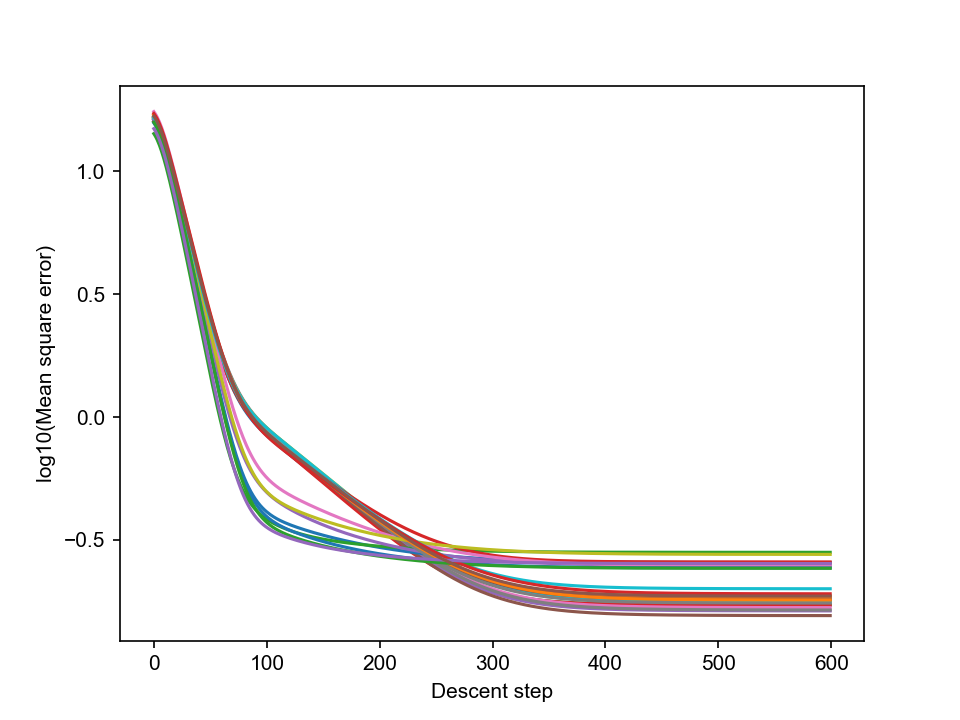

In [10]:
iq5 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg5)
iq5.quantify(**kwargs_dict)
res5 = iq5.compile_res()
iq5.plot_losses(log=True)

### Quantification 6

  0%|                                                                                                                                                  | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                         | 1/600 [00:00<02:41,  3.72it/s]

  2%|██▎                                                                                                                                      | 10/600 [00:00<00:18, 32.32it/s]

  3%|████▎                                                                                                                                    | 19/600 [00:00<00:11, 49.14it/s]

  5%|██████▍                                                                                                                                  | 28/600 [00:00<00:09, 60.44it/s]

  6%|████████▍                                                                                                                                | 37/600 [00:00<00:08, 67.33it/s]

  8%|██████████▌                                                                                                                              | 46/600 [00:00<00:07, 72.01it/s]

  9%|████████████▌                                                                                                                            | 55/600 [00:00<00:07, 75.29it/s]

 10%|██████████████▍                                                                                                                          | 63/600 [00:01<00:07, 76.09it/s]

 12%|████████████████▏                                                                                                                        | 71/600 [00:01<00:06, 77.01it/s]

 13%|██████████████████▎                                                                                                                      | 80/600 [00:01<00:06, 78.20it/s]

 15%|████████████████████▎                                                                                                                    | 89/600 [00:01<00:06, 79.05it/s]

 16%|██████████████████████▍                                                                                                                  | 98/600 [00:01<00:06, 81.62it/s]

 18%|████████████████████████▎                                                                                                               | 107/600 [00:01<00:05, 83.60it/s]

 19%|██████████████████████████▎                                                                                                             | 116/600 [00:01<00:05, 84.60it/s]

 21%|████████████████████████████▎                                                                                                           | 125/600 [00:01<00:05, 84.88it/s]

 22%|██████████████████████████████▎                                                                                                         | 134/600 [00:01<00:05, 85.57it/s]

 24%|████████████████████████████████▍                                                                                                       | 143/600 [00:01<00:05, 85.69it/s]

 25%|██████████████████████████████████▍                                                                                                     | 152/600 [00:02<00:05, 84.08it/s]

 27%|████████████████████████████████████▍                                                                                                   | 161/600 [00:02<00:05, 83.28it/s]

 28%|██████████████████████████████████████▌                                                                                                 | 170/600 [00:02<00:05, 83.75it/s]

 30%|████████████████████████████████████████▌                                                                                               | 179/600 [00:02<00:04, 84.83it/s]

 31%|██████████████████████████████████████████▌                                                                                             | 188/600 [00:02<00:04, 85.50it/s]

 33%|████████████████████████████████████████████▋                                                                                           | 197/600 [00:02<00:04, 86.68it/s]

 34%|██████████████████████████████████████████████▋                                                                                         | 206/600 [00:02<00:04, 87.03it/s]

 36%|████████████████████████████████████████████████▋                                                                                       | 215/600 [00:02<00:04, 85.17it/s]

 37%|██████████████████████████████████████████████████▊                                                                                     | 224/600 [00:02<00:04, 83.59it/s]

 39%|████████████████████████████████████████████████████▊                                                                                   | 233/600 [00:03<00:04, 82.05it/s]

 40%|██████████████████████████████████████████████████████▊                                                                                 | 242/600 [00:03<00:04, 81.27it/s]

 42%|████████████████████████████████████████████████████████▉                                                                               | 251/600 [00:03<00:04, 81.29it/s]

 43%|██████████████████████████████████████████████████████████▉                                                                             | 260/600 [00:03<00:04, 82.01it/s]

 45%|████████████████████████████████████████████████████████████▉                                                                           | 269/600 [00:03<00:04, 81.08it/s]

 46%|███████████████████████████████████████████████████████████████                                                                         | 278/600 [00:03<00:03, 81.79it/s]

 48%|█████████████████████████████████████████████████████████████████                                                                       | 287/600 [00:03<00:03, 82.56it/s]

 49%|███████████████████████████████████████████████████████████████████                                                                     | 296/600 [00:03<00:03, 82.83it/s]

 51%|█████████████████████████████████████████████████████████████████████▏                                                                  | 305/600 [00:03<00:03, 83.28it/s]

 52%|███████████████████████████████████████████████████████████████████████▏                                                                | 314/600 [00:04<00:03, 82.72it/s]

 54%|█████████████████████████████████████████████████████████████████████████▏                                                              | 323/600 [00:04<00:03, 81.01it/s]

 55%|███████████████████████████████████████████████████████████████████████████▎                                                            | 332/600 [00:04<00:03, 80.09it/s]

 57%|█████████████████████████████████████████████████████████████████████████████▎                                                          | 341/600 [00:04<00:03, 80.84it/s]

 58%|███████████████████████████████████████████████████████████████████████████████▎                                                        | 350/600 [00:04<00:03, 81.60it/s]

 60%|█████████████████████████████████████████████████████████████████████████████████▎                                                      | 359/600 [00:04<00:02, 82.16it/s]

 61%|███████████████████████████████████████████████████████████████████████████████████▍                                                    | 368/600 [00:04<00:02, 82.67it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████████▍                                                  | 377/600 [00:04<00:02, 82.98it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████████▍                                                | 386/600 [00:04<00:02, 81.25it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████████▌                                              | 395/600 [00:05<00:02, 78.20it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████████▎                                            | 403/600 [00:05<00:02, 77.05it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                          | 411/600 [00:05<00:02, 72.98it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 419/600 [00:05<00:02, 74.71it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                       | 427/600 [00:05<00:02, 74.20it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 435/600 [00:05<00:02, 71.30it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 443/600 [00:05<00:02, 67.99it/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 450/600 [00:05<00:02, 61.95it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 457/600 [00:05<00:02, 62.23it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 464/600 [00:06<00:02, 61.49it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 471/600 [00:06<00:02, 58.94it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 477/600 [00:06<00:02, 57.38it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                          | 483/600 [00:06<00:02, 55.14it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 489/600 [00:06<00:02, 53.51it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 495/600 [00:06<00:02, 51.78it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 501/600 [00:06<00:02, 46.79it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 509/600 [00:06<00:01, 53.99it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 515/600 [00:07<00:01, 53.15it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 524/600 [00:07<00:01, 61.45it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 533/600 [00:07<00:00, 67.74it/s]

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 542/600 [00:07<00:00, 71.65it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 551/600 [00:07<00:00, 74.43it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 559/600 [00:07<00:00, 75.81it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 568/600 [00:07<00:00, 79.35it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 577/600 [00:07<00:00, 81.88it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 586/600 [00:07<00:00, 83.62it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 595/600 [00:08<00:00, 83.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 73.87it/s]

(<Figure size 960x720 with 1 Axes>,
 <Axes: xlabel='Descent step', ylabel='log10(Mean square error)'>)

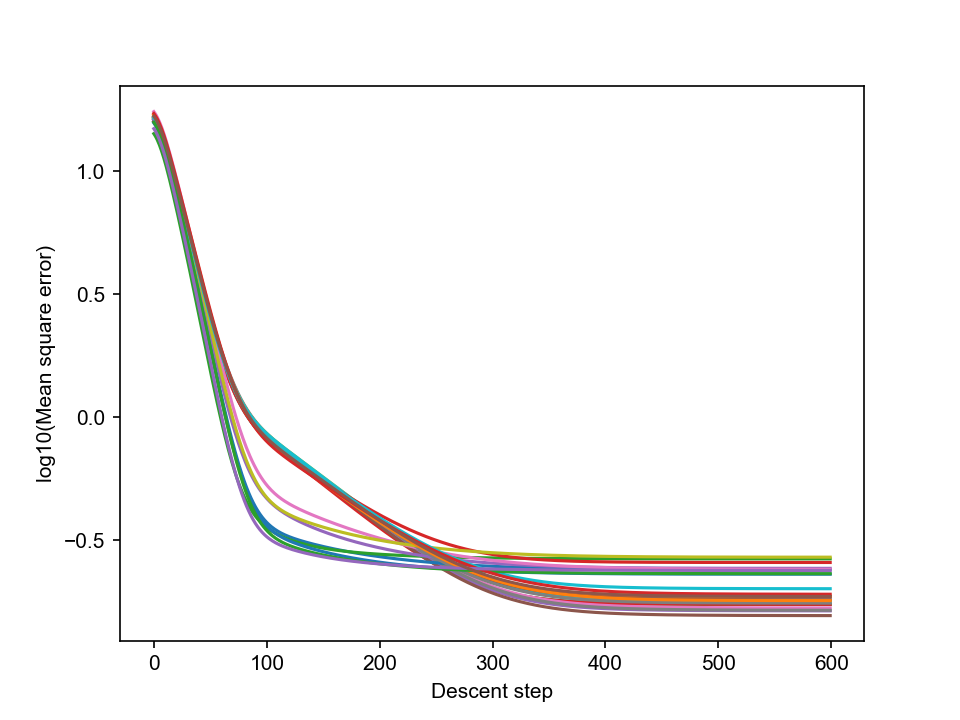

In [11]:
iq6 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg6)
iq6.quantify(**kwargs_dict)
res6 = iq6.compile_res()
iq6.plot_losses(log=True)

### Get calibrations

In [12]:
def calculate_calibration(res):
    mems = res.groupby("Frame")["Membrane signal"].mean()
    cyts = res.groupby("Frame")["Cytoplasmic signal"].mean()
    pre_post = [p.split("/")[-1] for p in paths]
    embryos = [p.split("/")[-2] for p in paths]
    lines = [p.split("/")[-3].split("_")[1] for p in paths]

    df_dict = {
        "Line": lines,
        "Embryo": embryos,
        "Exposure": pre_post,
        "Membrane": mems,
        "Cytoplasm": cyts,
    }
    df = pd.DataFrame(df_dict)

    pre = df.groupby(["Line", "Embryo"]).last()
    post = df.groupby(["Line", "Embryo"]).first()
    df = pd.DataFrame(
        {
            "mem_pre": pre.Membrane,
            "mem_post": post.Membrane,
            "cyt_pre": pre.Cytoplasm,
            "cyt_post": post.Cytoplasm,
        }
    )
    df.to_csv("temp.csv")
    df = pd.read_csv("temp.csv")
    os.remove("temp.csv")
    return df

In [13]:
df0 = calculate_calibration(res0)
df1 = calculate_calibration(res1)
df2 = calculate_calibration(res2)
df3 = calculate_calibration(res3)
df4 = calculate_calibration(res4)
df5 = calculate_calibration(res5)
df6 = calculate_calibration(res6)

In [14]:
# Mean and standard deviation for all the calibrations


def calculate_mean_std(df):
    c = df[df.Line == "sv2061"].apply(
        lambda x: ((x.cyt_pre - x.cyt_post) / (x.mem_post - x.mem_pre)) / 0.174, axis=1
    )
    return np.mean(c), np.std(c)


means, stds = zip(
    *[calculate_mean_std(df) for df in [df0, df1, df2, df3, df4, df5, df6]]
)
print(means[-1], stds[-1])
np.savetxt("../../data/calibration_constants.txt", means)

3.105836925083751 0.2831859968308208


In [15]:
# Saving full results for calibration 6 (will use later in a figure)
df6.to_csv("../../data/calibration_quantification6.csv", index=False)